# Art Class Hands-On Exercises

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import scipy
import seaborn as sns
from scipy import stats

## Exercise 1: Changing the functional fit
It seems that our Mauna Loa dataset is slightly exponential. Change the plain linear regression to an exponential regression

**Get Bills help on this because I'm failing at getting an exponential fit**

In [2]:
data = pd.read_csv("data/co2_mm_mlo.csv", header=51)

In [70]:
data["average_scaled"] = (data["average"] -data["average"].min()) / data["average"].max()

In [72]:
with pm.Model() as model:
    b = pm.Normal("b", mu=300, sigma=10)
    m = pm.Normal("m", mu=-50, sigma=30)
    
    sigma = pm.HalfNormal("sigma", sigma=100)
    
    x_ = pm.MutableData("x", data["decimal date"] - data["decimal date"].min())
    mu = pm.Deterministic("mu", pm.math.exp(m*x_)+b)
    
    pm.Normal("y", mu=mu, sigma=sigma, observed=data["average_scaled"])
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b, m, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
There were 13 divergences after tuning. Increase `target_accept` or reparameterize.
There were 15 divergences after tuning. Increase `target_accept` or reparameterize.


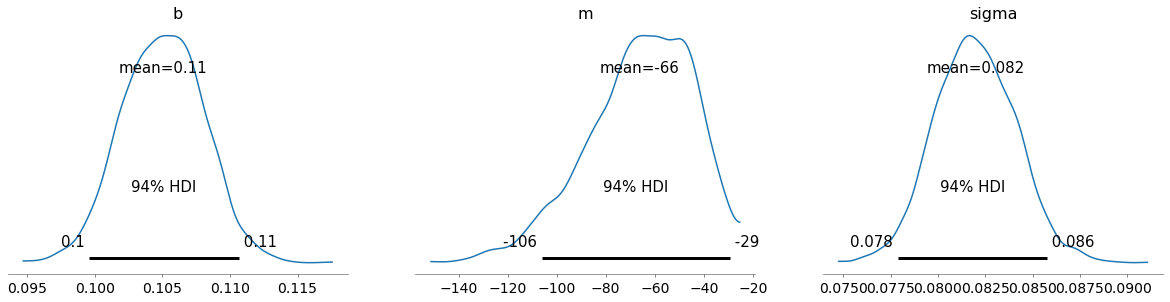

In [73]:
az.plot_posterior(idata.posterior, var_names=["b", "m", "sigma"]);

In [74]:
xl = np.linspace(0, 70, 200)

with model:
    pm.set_data({'x': xl})
    ppc = pm.sample_posterior_predictive(idata, var_names=["mu", "y"])
    idata.extend(ppc)

In [75]:
idata.posterior_predictive["y"].mean(axis=(0,1))

<xarray.DataArray 'y' (y_dim_0: 200)>
array([1.1052438 , 0.10494408, 0.10644276, 0.10559884, 0.10536744,
       0.10654669, 0.10482599, 0.10688094, 0.10344036, 0.10530124,
       0.10504075, 0.10626918, 0.10652724, 0.10418458, 0.10695563,
       0.10437028, 0.10592886, 0.10524874, 0.10495169, 0.1055743 ,
       0.10536053, 0.10424452, 0.10541219, 0.10684676, 0.10379924,
       0.10651972, 0.1035309 , 0.10502859, 0.10659245, 0.10500717,
       0.10513564, 0.10430931, 0.10451602, 0.10481071, 0.10351075,
       0.10517177, 0.10344503, 0.10464783, 0.10386257, 0.10413608,
       0.10646858, 0.10543354, 0.10348139, 0.10581552, 0.10813976,
       0.10509849, 0.1054273 , 0.10305825, 0.10484442, 0.10604534,
       0.10609433, 0.10437778, 0.10825168, 0.10723505, 0.10369151,
       0.10754812, 0.10564787, 0.1069109 , 0.10413926, 0.10463977,
       0.10401951, 0.10568239, 0.10431534, 0.1044239 , 0.10295139,
       0.10282455, 0.10519372, 0.10347133, 0.10576241, 0.10318221,
       0.10586824, 0.1074177 , 0.10530583, 0.1068859 , 0.10378617,
       0.10323967, 0.10550409, 0.10384632, 0.10508968, 0.10395934,
       0.1039484 , 0.10469331, 0.10405019, 0.10412888, 0.10448489,
       0.10495621, 0.10367124, 0.10600746, 0.10187648, 0.1064927 ,
       0.10488084, 0.10354957, 0.10588695, 0.10794265, 0.1059772 ,
       0.10404377, 0.10630451, 0.10369572, 0.10352741, 0.10495857,
       0.10436099, 0.10560893, 0.10450683, 0.1067874 , 0.10297376,
       0.10451817, 0.10324794, 0.1061031 , 0.10318911, 0.10686761,
       0.10630512, 0.10498574, 0.10512114, 0.10441183, 0.10483325,
       0.10607904, 0.1046883 , 0.10470083, 0.10681833, 0.10561761,
       0.10383038, 0.10359543, 0.10367436, 0.10551667, 0.10736012,
       0.10546944, 0.10498741, 0.10115978, 0.10411434, 0.10695853,
       0.10403611, 0.10535892, 0.1047082 , 0.10486264, 0.10563732,
       0.10505537, 0.10362731, 0.10737066, 0.10610688, 0.10565025,
       0.10587965, 0.10164942, 0.10459717, 0.10525462, 0.10510995,
       0.10610389, 0.10419785, 0.10666976, 0.10520329, 0.10613955,
       0.10854145, 0.10496026, 0.10599423, 0.10345291, 0.10480996,
       0.10412351, 0.10728712, 0.10704824, 0.10388884, 0.10608024,
       0.10280564, 0.10552655, 0.10393669, 0.10480962, 0.10695792,
       0.10694912, 0.10454225, 0.10442186, 0.10571374, 0.10404475,
       0.10581136, 0.1059561 , 0.10567303, 0.10485956, 0.10461084,
       0.10484239, 0.10563181, 0.10294394, 0.10720883, 0.1064901 ,
       0.10412062, 0.10253644, 0.1047573 , 0.10593099, 0.10277853,
       0.10501969, 0.10883534, 0.10315824, 0.10698395, 0.10644293,
       0.10495066, 0.10567015, 0.10607314, 0.10442527, 0.10447205,
       0.1066432 , 0.10630412, 0.10385255, 0.1059629 , 0.10438306])
Coordinates:
  * y_dim_0  (y_dim_0) int64 0 1 2 3 4 5 6 7 ... 192 193 194 195 196 197 198 199

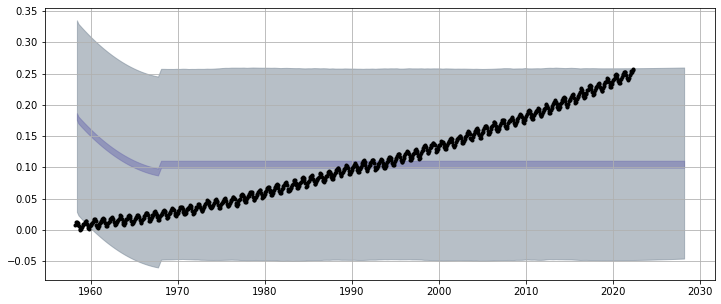

In [76]:
plt.figure(figsize=(12,5))

az.plot_hdi(x=xl + data["decimal date"].min(), hdi_data=az.hdi(idata.posterior_predictive.mu), color="slateblue")
az.plot_hdi(x=xl + data["decimal date"].min(), hdi_data=az.hdi(idata.posterior_predictive.y), color="slategray")

plt.plot(data["decimal date"], data["average_scaled"], "k.");

plt.grid(True);

## Exercise 1 Alternate (if the above doesnt work): Functional Fit Warmup
* Get folks to simulate data then fit, then write a Bayesian model to fit it.

* Then we provide a dataset that is not easily fit with a function, or hard to tell, and ask them to fit it and see what happens

* We can then ask them to repeat this later

## Exercise 2: Expand KNN Averaging and length scale intuition
From the expanded dataset below calculate the K nearest neighbors for the values of 2, 4, 6, 8.
Prior to plotting them think about what will happen conceptually, what is the tradeoffs here when we include more data, or less data? How will the plots look?

In [ ]:
x = np.linspace(2017.4, 2022.4, 100)
last_12_obs = data.sort_values("decimal date").tail(36)

def plot_data(ax):
    ax.plot(last_12_obs["decimal date"], last_12_obs["average"], "ko", label="Observed")
    ax.set_title("C02 measurement")
    ax.set_xlabel("Year")
    ax.set_ylabel("C02 Level");
    return

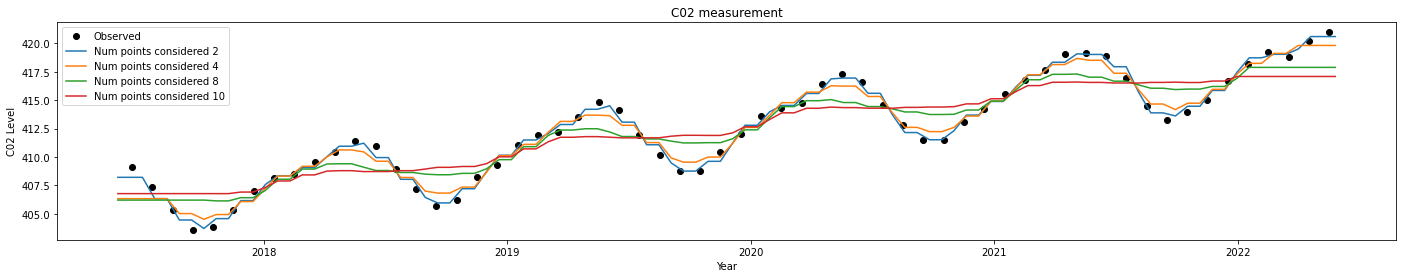

In [88]:
fig, ax = plt.subplots(figsize=(24,4))

for num_points_considered in (2, 4, 8, 10): 
    y_vals = []
    for point_of_interest in x:  
        y_val = (last_12_obs
            .assign(distance=np.abs(last_12_obs["decimal date"] - point_of_interest))
            .sort_values("distance")
            .head(num_points_considered)
            ["average"].mean())

        y_vals.append(y_val)
    plt.plot(x, y_vals, label = f"Num points considered {num_points_considered}")
plt.legend();

### Length Scale
Now repeat the same exercise for length scales. Use the values below

```
(.05, .01, .2, .4):
```

Before plotting think about this conceptually.
* Which length scale increase the relative weight of "far away" data points?
* Which length scale decreases the relative weight of "far away" data points?
* When we weight far away data more does the curve get more squiggly or more flat?


In [89]:
def kernel(x, x_prime, lengthscale):
    return np.exp( -1.0 * np.square(x - x_prime) / np.square(lengthscale))

def kernel_machine(x, y, x_prime, lengthscale):
    k = kernel(x, x_prime, lengthscale)
    w = k / np.sum(k)
    estimate = np.dot(w, y)
    return estimate

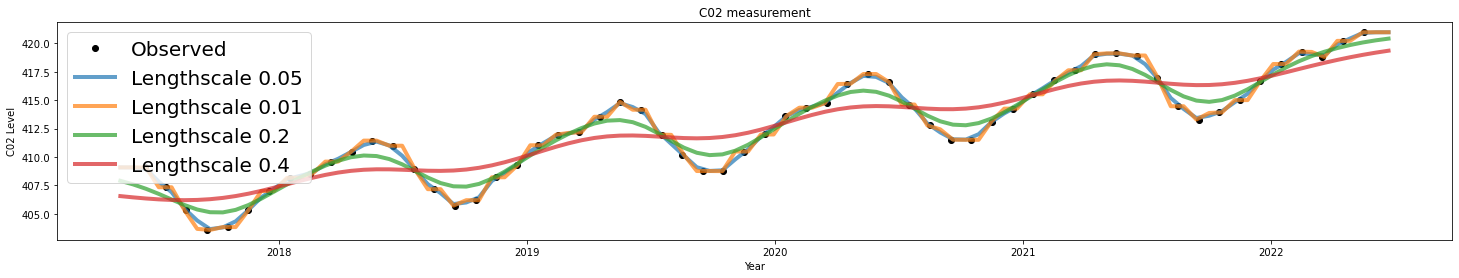

In [97]:
fig = plt.figure(figsize=(25,4))
ax = fig.gca()
plot_data(ax)

for lengthscale in (.05, .01, .2, .4):

    x_range = np.linspace(last_12_obs["decimal date"].min() - 0.1, last_12_obs["decimal date"].max() + 0.1, 100)
    estimates = []

    for x_prime in x_range:
        estimates.append(kernel_machine(
            last_12_obs["decimal date"].values, 
            last_12_obs["average"].values, 
            x_prime, 
            lengthscale,
        ))

    ax.plot(x_range, estimates, alpha=0.7, lw=4, label=f"Lengthscale {lengthscale}")
    ax.legend(fontsize=20, frameon=True);

### Exercise 3: Something about GPs
Ideally we've have some motivator for GPs here. Leaving as a placeholder